<a href="https://colab.research.google.com/github/ashayghiya/Hackathons/blob/master/News_Category_Machine_Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training

In [84]:
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
# Others
import re
import nltk
import string
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model, Model
from keras.layers import Flatten, Dropout, Activation, Input, Dense, concatenate
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

np.random.seed(2019)

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
df = pd.read_excel(r'Data_Train.xlsx')
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [86]:
df['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [87]:
num_words = [len(s.split()) for s in df['STORY']]
print(r'number of words per sample: {}'.format(np.mean(num_words)))
print(r'number of samples: {}'.format(len(num_words)))
print(r'ratio: {}'.format(len(num_words)/np.mean(num_words)))

number of words per sample: 107.58927635028842
number of samples: 7628
ratio: 70.89925928272638


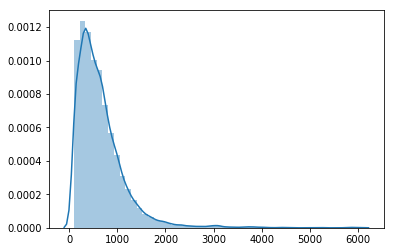

In [88]:
sns.distplot([len(s) for s in df['STORY']])

In [89]:
y = pd.get_dummies(df['SECTION'])
y.head()

,0,1,2,3
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1


In [0]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

In [0]:
df['text'] = df['STORY'].map(lambda x: clean_text(x))

In [92]:
df['text'][0]

'pain huge revers fee incom unheard among privat sector lender essenti mean yes bank took grant fee structur loan deal paid account upfront book borrow turn default fee tie loan deal fell crack gill vow shift safer account practic amort fee incom rather book upfront + + + gill s move mend past way mean nasti surpris futur good news consid investor love clean imag loath uncertainti + + + but gain without pain promis strong stabl balanc sheet come sacrific well investor give hope phenomen growth promis made kapoor'

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['text'].values, y.values, test_size = 0.2, random_state = 101)

In [94]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocabulary_size = len(tokenizer.word_index) + 1
print(vocabulary_size)

21450


In [95]:
trainsequences = tokenizer.texts_to_sequences(X_train)
print(trainsequences)

[[2117, 232, 122, 440, 1519, 3388, 694, 461, 187, 2736, 962, 14, 2181, 1348, 556, 2118, 1519, 7989, 698, 1520, 2423, 5, 100, 745, 6203, 2814, 1420, 6926, 2814, 795, 916, 340, 3531, 56, 124, 14, 59, 669, 3699, 54, 75, 106, 916, 2981, 56, 124, 1536, 2737, 211, 1519, 2424, 396, 1791, 8, 2119, 1520, 2423, 51, 2023, 54, 2182, 1737, 13015, 492, 2, 96, 56, 1520, 2423, 59, 8, 211, 612, 21, 58, 21, 795, 883, 124, 1125, 308, 225, 289, 25, 386, 585, 311, 2118, 1, 107, 1421], [40, 331, 12, 74, 1, 132, 331, 5, 18, 627, 618, 1012, 935, 1597, 174, 40, 409, 1095, 13016, 543, 4287, 23, 3840, 170, 1139, 18, 1597, 174, 982, 576, 2815, 1521, 935, 40, 1362, 2535, 79, 463, 528, 942, 936, 1, 331, 110, 12, 714, 1240, 331, 40, 331, 224, 43, 396, 12, 2889, 332, 7, 40, 331, 3, 40, 883, 332, 7, 40, 331, 12, 13017, 13018, 731, 417, 224, 7990, 1184, 26, 316, 579, 48, 350, 2024, 576, 2815, 40, 9644, 332, 7, 40, 331, 74, 1013, 9645, 2075, 60, 586, 188, 1139, 40, 3700, 731, 8, 2075, 214], [573, 301, 149, 723, 147, 353

In [0]:
MAXLEN = 200

In [97]:
trainseqs = pad_sequences(trainsequences, maxlen=MAXLEN, padding='post')
print(trainseqs)

[[ 2117   232   122 ...     0     0     0]
 [   40   331    12 ...     0     0     0]
 [  573   301   149 ...     0     0     0]
 ...
 [    8   117    57 ...     0     0     0]
 [  297  4532 21448 ...     0     0     0]
 [ 4664    93  1003 ...     0     0     0]]


In [0]:
testsequences = tokenizer.texts_to_sequences(X_test)
testseqs = pad_sequences(testsequences, maxlen=MAXLEN, padding='post')

In [99]:
testseqs.shape

(1526, 200)

In [100]:
y_train.shape

(6102, 4)

In [0]:
embedding_size = 32
op_units = df['SECTION'].nunique()

In [0]:
# define the model
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=MAXLEN))
model.add(Flatten())
model.add(Dense(op_units, activation='softmax'))

In [0]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 32)           686400    
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 25604     
Total params: 712,004
Trainable params: 712,004
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
# fit the model
model.fit(trainseqs, 
          y_train, 
          epochs=10,
          validation_data=(testseqs,y_test),
          verbose=2)

Train on 6102 samples, validate on 1526 samples
Epoch 1/10
 - 1s - loss: 0.8857 - acc: 0.6762 - val_loss: 0.2852 - val_acc: 0.9404
Epoch 2/10
 - 1s - loss: 0.1559 - acc: 0.9641 - val_loss: 0.1285 - val_acc: 0.9692
Epoch 3/10
 - 1s - loss: 0.0610 - acc: 0.9875 - val_loss: 0.1028 - val_acc: 0.9731
Epoch 4/10
 - 1s - loss: 0.0312 - acc: 0.9952 - val_loss: 0.1010 - val_acc: 0.9699
Epoch 5/10
 - 1s - loss: 0.0190 - acc: 0.9966 - val_loss: 0.0964 - val_acc: 0.9718
Epoch 6/10
 - 1s - loss: 0.0126 - acc: 0.9975 - val_loss: 0.0925 - val_acc: 0.9738
Epoch 7/10
 - 1s - loss: 0.0098 - acc: 0.9971 - val_loss: 0.0930 - val_acc: 0.9744
Epoch 8/10
 - 1s - loss: 0.0077 - acc: 0.9977 - val_loss: 0.0988 - val_acc: 0.9718
Epoch 9/10
 - 1s - loss: 0.0069 - acc: 0.9980 - val_loss: 0.1032 - val_acc: 0.9718
Epoch 10/10
 - 1s - loss: 0.0057 - acc: 0.9985 - val_loss: 0.0982 - val_acc: 0.9718


In [106]:
# evaluate the model
loss, accuracy = model.evaluate(testseqs, y_test, verbose=2)
print('Loss: %f' % (loss))
print('Accuracy: %f' % (accuracy*100))

Loss: 0.098217
Accuracy: 97.182176


In [107]:
from sklearn.metrics import classification_report
y_test_list = [l.index(max(l)) for l in y_test.tolist()]
eval_list = [l.index(max(l)) for l in model.predict(testseqs).tolist()]
print(classification_report(y_test_list,eval_list))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       332
           1       0.96      0.98      0.97       541
           2       0.98      0.98      0.98       382
           3       0.99      0.98      0.98       271

    accuracy                           0.97      1526
   macro avg       0.97      0.97      0.97      1526
weighted avg       0.97      0.97      0.97      1526



# Prediction

In [0]:
df1 = pd.read_excel(r'Data_Test.xlsx')
df1['text'] = df1['STORY'].map(lambda x: clean_text(x))
predsequences = tokenizer.texts_to_sequences(df1['text'].values)
predseqs = pad_sequences(predsequences, maxlen=MAXLEN, padding='post')

In [109]:
pred = model.predict(predseqs)
pred_list = pred.tolist()
pred_section = [l.index(max(l)) for l in pred_list]
df1['SECTION'] = pred_section
df1.head()

,STORY,text,SECTION
0,2019 will see gadgets like gaming smartphones ...,2019 see gadget like game smartphon wearabl me...,1
1,It has also unleashed a wave of changes in the...,also unleash wave chang mcu make sure futur lo...,2
2,It can be confusing to pick the right smartpho...,confus pick right smartphon yourself segreg to...,1
3,The mobile application is integrated with a da...,mobil applic integr dashboard confirm regist p...,1
4,We have rounded up some of the gadgets that sh...,round gadget show 2018 left indel mark on cons...,1


In [0]:
df1.to_excel(r'check_pred.xlsx')
df1['SECTION'].to_excel(r'prediction.xlsx',index=False)

# Colab Guide 